In [22]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
api = 'c4ad87b03bec1878bc0be6156d4472b0'
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
def quarterly_data(ticker):
    income_statement_q = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{ticker}?period=quarter&limit=400&apikey={api}').json()
    key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period=quarter&limit=400&apikey={api}').json()
    profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{ticker}?period=quarter&limit=400&apikey={api}').json()
    
    millions = 1000000
    
    financials = {}
    length = min([len(income_statement_q), len(balance_sheet), len(cash_flow), len(Ratios), len(key_Metrics)])
    for item in range(length): # 10 years
        financials[dates[item]]={}
        financials[dates[item]]['Calendar_Year'] = income_statement_q[item]['calendarYear']
        financials[dates[item]]['Quarter'] = income_statement_q[item]['period']
        financials[dates[item]]['Mkt Cap'] = key_Metrics[item]['marketCap'] /millions
        financials[dates[item]]['Debt to Equity'] = key_Metrics[item]['debtToEquity']
        financials[dates[item]]['Debt to Assets'] = key_Metrics[item]['debtToAssets']
        financials[dates[item]]['Revenue per Share'] = key_Metrics[item]['revenuePerShare']
        financials[dates[item]]['NI per Share'] = key_Metrics[item]['netIncomePerShare']
        financials[dates[item]]['outstandingShares'] = income_statement_q[item]['weightedAverageShsOutDil'] / millions
        
    # income statement
        financials[dates[item]]['Revenue'] = income_statement_q[item]['revenue'] / millions
        financials[dates[item]]['Gross Profit'] = income_statement_q[item]['grossProfit'] / millions
        financials[dates[item]]['R&D Expenses'] = income_statement_q[item]['researchAndDevelopmentExpenses']/ millions
        financials[dates[item]]['Op Expenses'] = income_statement_q[item]['operatingExpenses'] / millions
        financials[dates[item]]['Op Income'] = income_statement_q[item]['operatingIncome'] / millions
        financials[dates[item]]['Net Income'] = income_statement_q[item]['netIncome'] / millions
    
    # balance sheet
        financials[dates[item]]['Cash'] = balance_sheet[item]['cashAndCashEquivalents'] / millions
        financials[dates[item]]['Receivables'] = balance_sheet[item]['netReceivables'] / millions
        financials[dates[item]]['Inventory'] = balance_sheet[item]['inventory'] / millions
        financials[dates[item]]['Cur Assets'] = balance_sheet[item]['totalCurrentAssets'] / millions
        financials[dates[item]]['Tax Assets'] = balance_sheet[item]['taxAssets'] / millions
        financials[dates[item]]['LT Assets'] = balance_sheet[item]['totalNonCurrentAssets'] / millions
        financials[dates[item]]['Int Assets'] = balance_sheet[item]['intangibleAssets'] / millions
        financials[dates[item]]['Total Assets'] = balance_sheet[item]['totalAssets'] / millions
        financials[dates[item]]['Payables'] = balance_sheet[item]['accountPayables'] / millions
        financials[dates[item]]['Deferred Revenue Current'] = balance_sheet[item]['deferredRevenue'] / millions
        financials[dates[item]]['Deferred Revenue LongTerm'] = balance_sheet[item]['deferredRevenueNonCurrent'] / millions
        financials[dates[item]]['Cur Liab'] = balance_sheet[item]['totalCurrentLiabilities'] / millions
        financials[dates[item]]['LT Debt'] = balance_sheet[item]['longTermDebt'] / millions
        financials[dates[item]]['LT Liab'] = balance_sheet[item]['totalNonCurrentLiabilities'] / millions
        financials[dates[item]]['Total Liab'] = balance_sheet[item]['totalLiabilities'] / millions
        financials[dates[item]]['SH Equity'] = balance_sheet[item]['totalStockholdersEquity'] / millions
    
    # cash flow
        financials[dates[item]]['cash_flow Operations'] = cash_flow[item]['netCashProvidedByOperatingActivities'] / millions
        financials[dates[item]]['cash_flow Investing'] = cash_flow[item]['netCashUsedForInvestingActivites'] / millions
        financials[dates[item]]['cash_flow Financing'] = cash_flow[item]['netCashUsedProvidedByFinancingActivities'] / millions
        financials[dates[item]]['CAPEX'] = cash_flow[item]['capitalExpenditure'] / millions
        financials[dates[item]]['Fcash_flow'] = cash_flow[item]['freeCashFlow'] / millions
        financials[dates[item]]['Dividends Paid'] = cash_flow[item]['dividendsPaid'] / millions
    
    # income statement ratios
        financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
        financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
        financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
        financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
    
    # balance sheet ratios
        financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
        financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
        financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
        financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']

    # return ratios
        financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
        financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
        financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
    
    # Valuation/Price ratios
        financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
        financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
        financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
        financials[dates[item]]['Price To FCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
        financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
        financials[dates[item]]['EPS'] = income_statement_q[item]['eps']
 
        
    df = pd.DataFrame(financials)
    df = df.T
    df['Ticker'] = ticker
    df.to_csv(f'financials/{ticker}.csv')
    
    
    return df
    

## get dates

In [8]:
# Request financial data from API
company = 'AAPL'


income_statement_q = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?period=quarter&limit=400&apikey={api}').json()
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarter&limit=400&apikey={api}').json()
cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?period=quarter&limit=400&apikey={api}').json()
Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{company}?period=quarter&limit=400&apikey={api}').json()
key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?period=quarter&limit=400&apikey={api}').json()
profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{company}?period=quarter&limit=400&apikey={api}').json()
#shares_float = requests.get(f'https://financialmodelingprep.com/api/v4/shares_float?symbol={company}?period=quarter&apikey={api}').json()

income_statement_q_df = pd.DataFrame(income_statement_q)
income_statement_q_df.head()
dates = income_statement_q_df['date']

In [9]:
dates

0      2022-09-24
1      2022-06-25
2      2022-03-26
3      2021-12-25
4      2021-09-25
          ...    
144    1986-09-30
145    1986-06-30
146    1986-03-31
147    1985-12-31
148    1985-09-30
Name: date, Length: 149, dtype: object

## apply to list of tickers

In [4]:
df_tech_sector_tickers = pd.read_excel('NASDAQ_tickers.xlsx', sheet_name='GICS - Sector')

In [5]:
df_tech_sector_tickers.head()

,Company,Ticker,Industry,Sector
0,KBR INC,KBR,IT Services,IT Consulting & Services
1,INPIXON,INPX,IT Services,IT Consulting & Services
2,AMERI HOLDINGS INC,AMRH,IT Services,IT Consulting & Services
3,BOOZ ALLEN HAMILTON HLDG CP,BAH,IT Services,IT Consulting & Services
4,COGNIZANT TECH SOLUTIONS,CTSH,IT Services,IT Consulting & Services


In [6]:
tickers = df_tech_sector_tickers['Ticker']

In [12]:
#result = [quarterly_data(ticker) for ticker in tickers]

In [18]:
df_aapl = pd.read_csv('financials/AAPL.csv')
df_aapl.columns = df_aapl.columns.str.replace('Unnamed: 0', 'Date')
df_aapl.columns

Index(['Date', 'Calendar_Year', 'Quarter', 'Mkt Cap', 'Debt to Equity',
       'Debt to Assets', 'Revenue per Share', 'NI per Share',
       'outstandingShares', 'Revenue', 'Gross Profit', 'R&D Expenses',
       'Op Expenses', 'Op Income', 'Net Income', 'Cash', 'Receivables',
       'Inventory', 'Cur Assets', 'Tax Assets', 'LT Assets', 'Int Assets',
       'Total Assets', 'Payables', 'Deferred Revenue Current',
       'Deferred Revenue LongTerm', 'Cur Liab', 'LT Debt', 'LT Liab',
       'Total Liab', 'SH Equity', 'cash_flow Operations',
       'cash_flow Investing', 'cash_flow Financing', 'CAPEX', 'Fcash_flow',
       'Dividends Paid', 'Gross Profit Margin', 'Op Margin', 'Int Coverage',
       'Net Profit Margin', 'Dividend Yield', 'Current Ratio',
       'Operating Cycle', 'Days of AP Outstanding', 'Cash Conversion Cycle',
       'ROA', 'ROE', 'ROCE', 'PE', 'PS', 'PB', 'Price To FCF', 'PEG', 'EPS',
       'Ticker'],
      dtype='object')

In [20]:
df_aapl_margins = df_aapl[['Date','Ticker','Gross Profit Margin', 'Op Margin','Net Profit Margin']]
df_aapl_margins['Gross Profit Margin'] = df_aapl_margins['Gross Profit Margin']*100
df_aapl_margins['Op Margin'] = df_aapl_margins['Op Margin']*100
df_aapl_margins['Net Profit Margin'] = df_aapl_margins['Net Profit Margin']*100

/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_70226/3235825567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl_margins['Gross Profit Margin'] = df_aapl_margins['Gross Profit Margin']*100
/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_70226/3235825567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl_margins['Op Margin'] = df_aapl_margins['Op Margin']*100
/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_70226/3235825567.py:4: SettingWithCopyWarning: 
A

In [21]:
df_aapl_margins

,Date,Ticker,Gross Profit Margin,Op Margin,Net Profit Margin
0,2022-09-24,AAPL,42.26,27.62,22.99
1,2022-06-25,AAPL,43.26,27.82,23.44
2,2022-03-26,AAPL,43.75,30.82,25.71
3,2021-12-25,AAPL,43.76,33.47,27.94
4,2021-09-25,AAPL,42.20,28.53,24.65
...,...,...,...,...,...
127,1990-12-31,AAPL,54.18,13.63,8.98
128,1990-09-30,AAPL,56.33,10.38,7.27
129,1990-06-30,AAPL,57.63,13.36,8.78
130,1990-03-31,AAPL,58.01,14.80,9.79


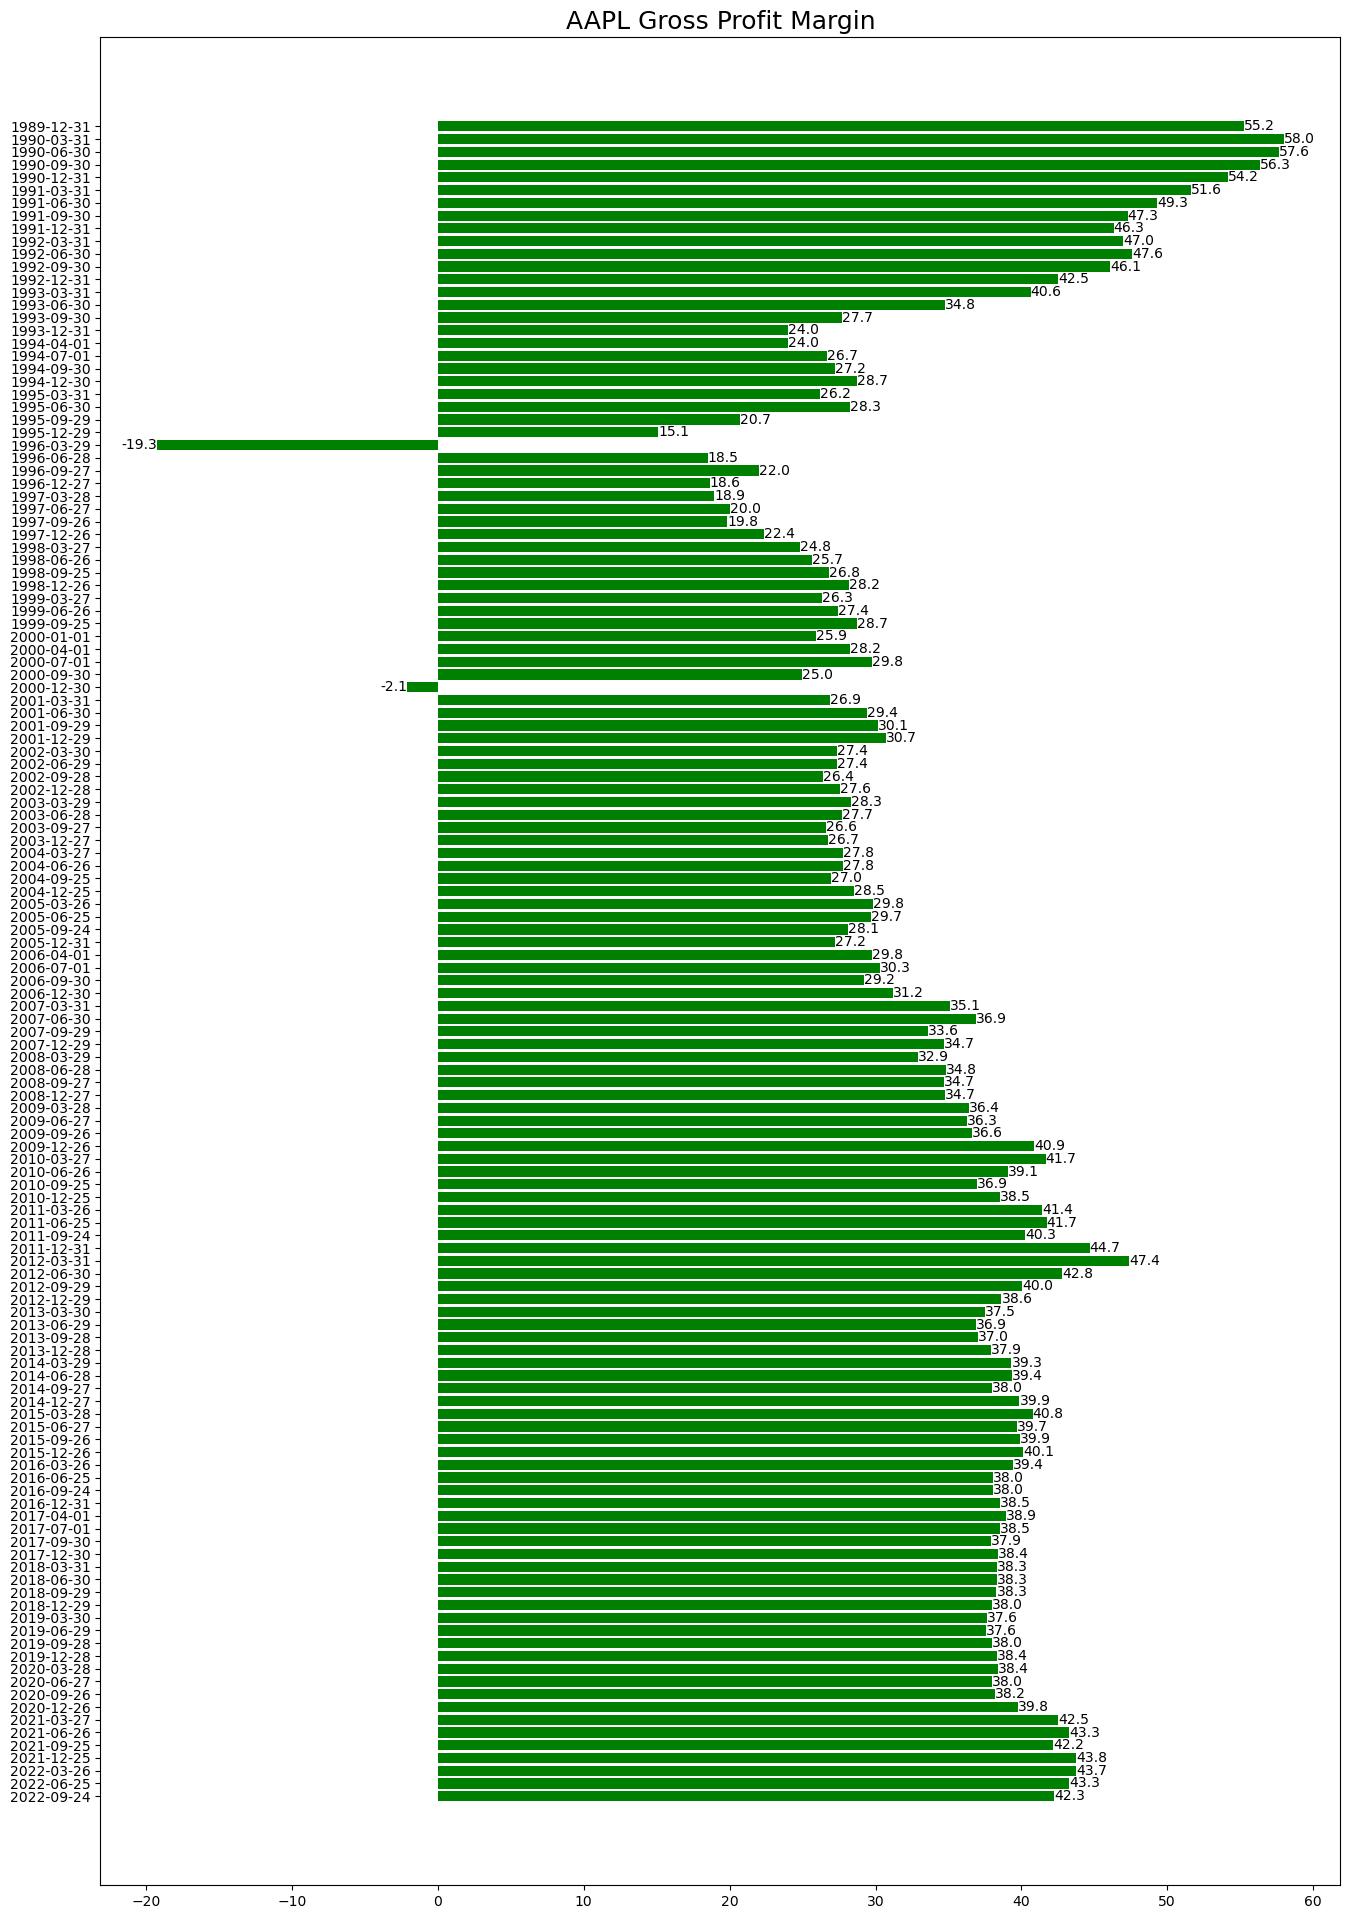

In [27]:
fig, ax = plt.subplots(figsize=(16,24))

ax.set_title('AAPL Gross Profit Margin', size=18)

plt.barh(df_aapl_margins['Date'], df_aapl_margins['Gross Profit Margin'], color='green')

ax.bar_label(ax.containers[0], fmt='%.1f')

#plt.xticks(rotation=90)
plt.show()

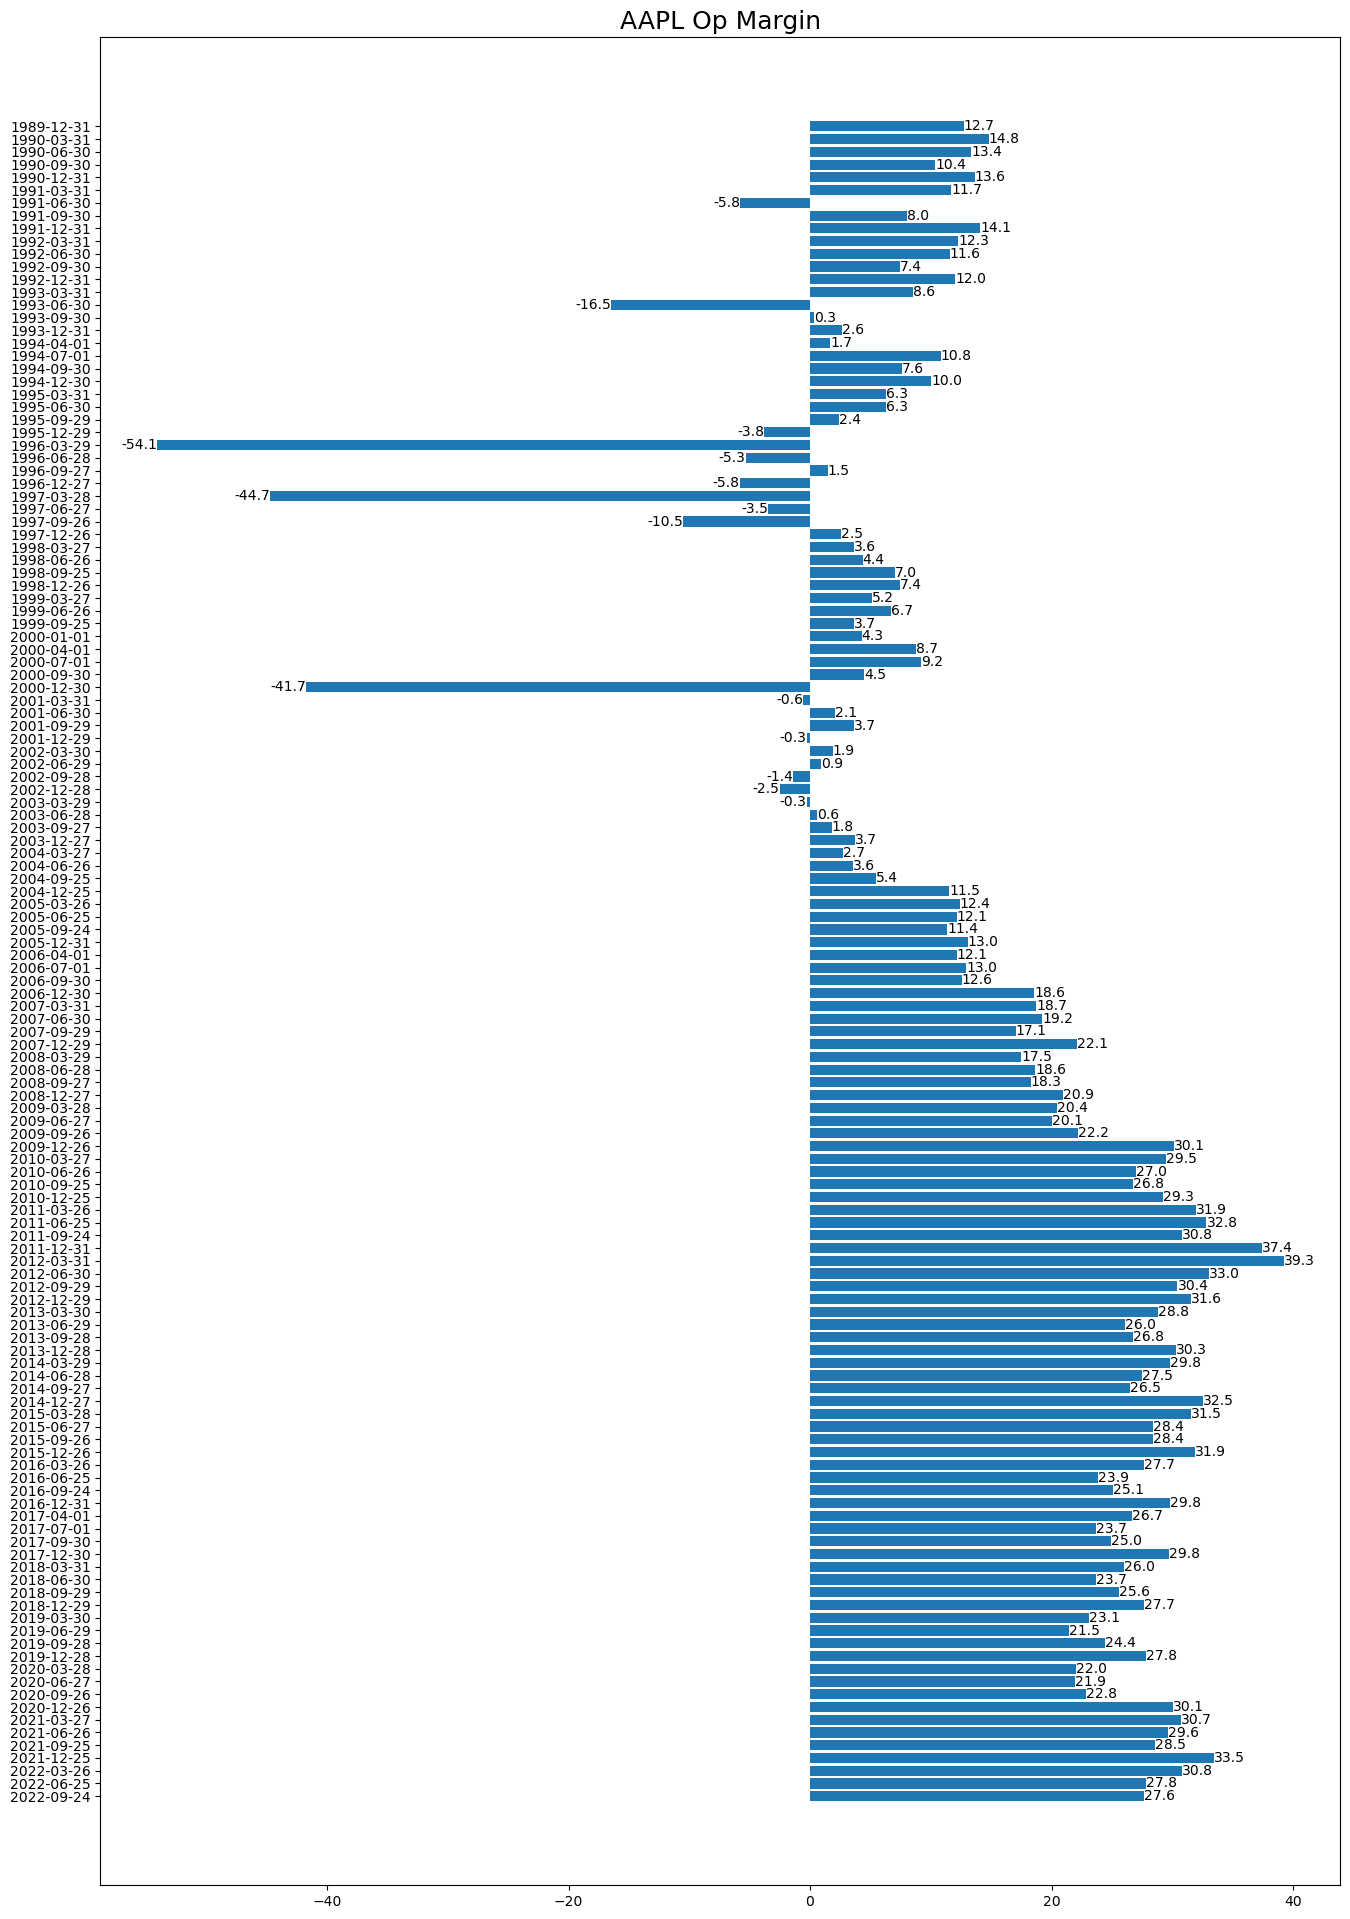

In [28]:
fig, ax = plt.subplots(figsize=(16,24))

ax.set_title('AAPL Op Margin', size=18)

plt.barh(df_aapl_margins['Date'], df_aapl_margins['Op Margin'])

ax.bar_label(ax.containers[0], fmt='%.1f')

#plt.xticks(rotation=90)
plt.show()